In [26]:
#Importing Libraries which we need in that project
'''
Projede bizim ihtiyacımız olan kütüphaneleri tanımlıyoruz. Numpy kütüphanesi matematiksel ve matris işlemleri için, pandas,
dosya işlemleri için, matplotlib, görselleştirme için, os, işletim sistemindeki dosyalarla işlemler için, random, rastgele sayı
üretmek için, tensorflow, derin öğrenme algoritmalarını kullanmak için, warning ise sistemdeki uyarıları kaldırmak için 
kullanıldı.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
# File directories...
'''
Dosyadaki görüntüleri bir değişkene atamak için os kütüphanesinin içerisindeki fonksiyonları kullanıyoruz.
'''
damaged = os.path.join('C:\\Users\\cagri\\OneDrive\\Masaüstü\\MyDocuments\\Bionluk\\candeviren\\damaged')
less_damaged = os.path.join('C:\\Users\\cagri\\OneDrive\\Masaüstü\\MyDocuments\\Bionluk\\candeviren\\less_damaged')
non_damaged = os.path.join('C:\\Users\\cagri\\OneDrive\\Masaüstü\\MyDocuments\\Bionluk\\candeviren\\non_damaged')

In [3]:
# Store the name of image files into damaged_names, less_damaged_names and non_damaged_names
'''
Ardından dosyadaki görüntülerin dosya isimlerini değişkene atıyoruz
'''
damaged_names = os.listdir(damaged)
less_damaged_names = os.listdir(less_damaged)
non_damaged_names = os.listdir(non_damaged)

In [4]:
damaged_names

['dmg (0).jpg',
 'dmg (1).jpg',
 'dmg (10).jpg',
 'dmg (11).jpg',
 'dmg (12).jpg',
 'dmg (13).jpg',
 'dmg (14).jpg',
 'dmg (15).jpg',
 'dmg (16).jpg',
 'dmg (17).jpg',
 'dmg (18).jpg',
 'dmg (19).jpg',
 'dmg (2).jpg',
 'dmg (20).jpg',
 'dmg (21).jpg',
 'dmg (22).jpg',
 'dmg (23).jpg',
 'dmg (24).jpg',
 'dmg (25).jpg',
 'dmg (26).jpg',
 'dmg (27).jpg',
 'dmg (28).jpg',
 'dmg (29).jpg',
 'dmg (3).jpg',
 'dmg (30).jpg',
 'dmg (31).jpg',
 'dmg (32).jpg',
 'dmg (33).jpg',
 'dmg (34).jpg',
 'dmg (35).jpg',
 'dmg (36).jpg',
 'dmg (37).jpg',
 'dmg (38).jpg',
 'dmg (39).jpg',
 'dmg (4).jpg',
 'dmg (5).jpg',
 'dmg (6).jpg',
 'dmg (7).jpg',
 'dmg (8).jpg',
 'dmg (9).jpg']

In [5]:
less_damaged_names

['less_dmg (1).jpg',
 'less_dmg (10).jpg',
 'less_dmg (11).jpg',
 'less_dmg (12).jpg',
 'less_dmg (13).jpg',
 'less_dmg (14).jpg',
 'less_dmg (15).jpg',
 'less_dmg (16).jpg',
 'less_dmg (17).jpg',
 'less_dmg (18).jpg',
 'less_dmg (19).jpg',
 'less_dmg (2).jpg',
 'less_dmg (20).jpg',
 'less_dmg (21).jpg',
 'less_dmg (22).jpg',
 'less_dmg (23).jpg',
 'less_dmg (24).jpg',
 'less_dmg (25).jpg',
 'less_dmg (3).jpg',
 'less_dmg (4).jpg',
 'less_dmg (5).jpg',
 'less_dmg (6).jpg',
 'less_dmg (7).jpg',
 'less_dmg (8).jpg',
 'less_dmg (9).jpg']

In [6]:
non_damaged_names

['non_dmg (1).jpg',
 'non_dmg (10).jpg',
 'non_dmg (100).jpg',
 'non_dmg (101).jpg',
 'non_dmg (102).jpg',
 'non_dmg (103).jpg',
 'non_dmg (104).jpg',
 'non_dmg (105).jpg',
 'non_dmg (106).jpg',
 'non_dmg (107).jpg',
 'non_dmg (108).jpg',
 'non_dmg (109).jpg',
 'non_dmg (11).jpg',
 'non_dmg (110).jpg',
 'non_dmg (111).jpg',
 'non_dmg (112).jpg',
 'non_dmg (113).jpg',
 'non_dmg (114).jpg',
 'non_dmg (115).jpg',
 'non_dmg (116).jpg',
 'non_dmg (117).jpg',
 'non_dmg (118).jpg',
 'non_dmg (119).jpg',
 'non_dmg (12).jpg',
 'non_dmg (120).jpg',
 'non_dmg (121).jpg',
 'non_dmg (122).jpg',
 'non_dmg (123).jpg',
 'non_dmg (124).jpg',
 'non_dmg (125).jpg',
 'non_dmg (126).jpg',
 'non_dmg (127).jpg',
 'non_dmg (128).jpg',
 'non_dmg (129).jpg',
 'non_dmg (13).jpg',
 'non_dmg (130).jpg',
 'non_dmg (131).jpg',
 'non_dmg (132).jpg',
 'non_dmg (133).jpg',
 'non_dmg (134).jpg',
 'non_dmg (135).jpg',
 'non_dmg (136).jpg',
 'non_dmg (137).jpg',
 'non_dmg (138).jpg',
 'non_dmg (139).jpg',
 'non_dmg (14).j

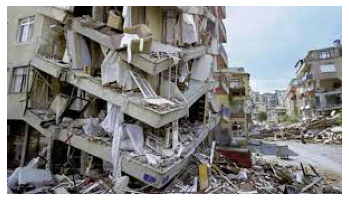

In [7]:
# Printing one image to look that, did we reach the file without problem
'''
Bir görüntüyü ekrana basıyoruz, bunun sebebi istenen dosyalara doğru şekilde erişebildik mi kontrol etmek.
'''
img = mpimg.imread('C:\\Users\\cagri\\OneDrive\\Masaüstü\\MyDocuments\\Bionluk\\candeviren\\damaged\\dmg (1).jpg')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [8]:
# In here, we should generate some images because our photo files are imbalanced right now that is why we can use data,
# augmentation to make the dataset balanced.
'''
Bu aşamada, bazı görüntüleri veri artırma yöntemleriyle çoğaltmak, bunu yapmamızın sebebi verisetimizdeki 3 sınıfın da görüntü
sayıları eşit değil, dengesizlikleri ortadan kaldırmak için böyle bir işlem yapıyoruz.
'''
datagen = ImageDataGenerator(rotation_range = 60,shear_range = 0.2,zoom_range = 0.1,horizontal_flip = True,
                             brightness_range = (0.5, 1.5))

# For damage photos we can generate them for rotating 4 times and then it will be good enough for our project
'''
Hasarlı bina görüntülerini artırmak için her bir fotoğrafı 4 kez döndürüyoruz. Bu veri artırma yöntemi veri setimiz için
ideal olacaktır.
'''
def augmented_damage_photos():
    for i in range(len(damaged_names)):
        img = mpimg.imread(f'C:\\Users\\cagri\\OneDrive\\Masaüstü\\MyDocuments\\Bionluk\\candeviren\\damaged\\dmg ({i}).jpg')
        x = img_to_array(img)
        x = x.reshape((1, ) + x.shape)
        j = 0
        for batch in datagen.flow(x, batch_size = 1,
                          save_to_dir ='C:\\Users\\cagri\\OneDrive\\Masaüstü\\MyDocuments\\Bionluk\\candeviren\\damaged', 
                          save_prefix ='augmented_dmg', save_format ='jpg'):
            j += 1
            if j > 3:
                break
        if i >= 39:
            break
                
datagen_less_dmg = ImageDataGenerator(rotation_range = 30,shear_range = 0.2,zoom_range = 0.1,horizontal_flip = True,
                             brightness_range = (0.5, 1.5))

# For less damage photo files I have used to rotate 7 times photos to generate samples.             
'''
Az hasarlı görüntülerimizde az olduğundan bunları da veri artırma yöntemi ile artırmamız gerekiyor. Burada da görüntüleri 7 kez
döndürüyoruz ve sonucunda tüm veriseti dengelenmiş oluyor.
'''
def augmented_less_damage_photos():
    for i in range(len(less_damaged_names)):
        img = mpimg.imread(f'C:\\Users\\cagri\\OneDrive\\Masaüstü\\MyDocuments\\Bionluk\\candeviren\\less_damaged\\less_dmg ({i}).jpg')
        x = img_to_array(img)
        x = x.reshape((1, ) + x.shape)
        j = 0
        for batch in datagen_less_dmg.flow(x, batch_size = 1,
                          save_to_dir ='C:\\Users\\cagri\\OneDrive\\Masaüstü\\MyDocuments\\Bionluk\\candeviren\\less_damaged', 
                          save_prefix ='augmented_dmg', save_format ='jpg'):
            j += 1
            if j > 6:
                break

In [9]:
# That is for invoking function for damage photos
'''
Hasarlı verisetimizi çağırmak için kullanılan fonksiyonumuz
'''
augmented_damage_photos()

In [11]:
# That is for invoking function for less damage photos
'''
Az hasarlı verisetimizi çağırmak için kullanılan fonksiyounumuz
'''
augmented_less_damage_photos()

In [12]:
# That directory is for train damaged.
'''
Bu işlem hasarlı eğitim görüntüleri için.
'''
train_damaged_dir = os.path.join('C:\\Users\\cagri\\OneDrive\\Masaüstü\\MyDocuments\\Bionluk\\candeviren\\train\\damaged')

# That directory is for train non damaged.
'''
Bu işlem hasarsız eğitim görüntüleri için.
'''
train_non_damaged_dir = os.path.join('C:\\Users\\cagri\\OneDrive\\Masaüstü\\MyDocuments\\Bionluk\\candeviren\\train\\non_damaged')

# That directory is for train less damaged.
'''
Bu işlem az hasarlı eğitim görüntüleri için.
'''
train_less_damaged_dir = os.path.join('C:\\Users\\cagri\\OneDrive\\Masaüstü\\MyDocuments\\Bionluk\\candeviren\\train\\less_damaged')

# That directory is for validation damaged.
'''
Bu işlem hasarlı validasyon görüntüleri için.
'''
validation_damaged_dir = os.path.join('C:\\Users\\cagri\\OneDrive\\Masaüstü\\MyDocuments\\Bionluk\\candeviren\\validation\\damaged')

# That directory is for validation non damaged.
'''
Bu işlem hasarsız validasyon görüntüleri için.
'''
validation_non_damaged_dir = os.path.join('C:\\Users\\cagri\\OneDrive\\Masaüstü\\MyDocuments\\Bionluk\\candeviren\\validation\\non_damaged')

# That directory is for validation less damaged.
'''
Bu işlem az hasarlı validasyon görüntüleri için.
'''
validation_less_damaged_dir = os.path.join('C:\\Users\\cagri\\OneDrive\\Masaüstü\\MyDocuments\\Bionluk\\candeviren\\validation\\less_damaged')

In [17]:
# Showing that our dataset's image names and labels.
'''
Verisetimizde ki görüntülerin isimleri veetiket değerlerini ekrana basıyoruz.
'''
a = random.randint(1,20)
b = random.randint(20, 40)

train_damaged_names = os.listdir(train_damaged_dir)
print('DAMAGED FILE IMAGES \n')
print(train_damaged_names[a:b])

train_less_damaged_names = os.listdir(train_less_damaged_dir)
print('LESS DAMAGED FILE IMAGES \n')
print(train_less_damaged_names[a:b])

train_non_damaged_names = os.listdir(train_non_damaged_dir)
print('NON DAMAGED FILE IMAGES \n')
print(train_non_damaged_names[a:b])

DAMAGED FILE IMAGES 

['augmented_dmg_0_3963.jpg', 'augmented_dmg_0_3978.jpg', 'augmented_dmg_0_3981.jpg', 'augmented_dmg_0_4221.jpg', 'augmented_dmg_0_4271.jpg', 'augmented_dmg_0_4338.jpg', 'augmented_dmg_0_4339.jpg', 'augmented_dmg_0_4492.jpg', 'augmented_dmg_0_4527.jpg', 'augmented_dmg_0_4618.jpg', 'augmented_dmg_0_4642.jpg', 'augmented_dmg_0_4730.jpg', 'augmented_dmg_0_4731.jpg', 'augmented_dmg_0_4738.jpg', 'augmented_dmg_0_4741.jpg', 'augmented_dmg_0_4822.jpg', 'augmented_dmg_0_5101.jpg', 'augmented_dmg_0_5152.jpg', 'augmented_dmg_0_5181.jpg', 'augmented_dmg_0_5230.jpg', 'augmented_dmg_0_5231.jpg', 'augmented_dmg_0_5262.jpg', 'augmented_dmg_0_5771.jpg', 'augmented_dmg_0_5776.jpg', 'augmented_dmg_0_5782.jpg', 'augmented_dmg_0_5912.jpg', 'augmented_dmg_0_5947.jpg', 'augmented_dmg_0_6078.jpg', 'augmented_dmg_0_6111.jpg', 'augmented_dmg_0_6166.jpg', 'augmented_dmg_0_6211.jpg', 'augmented_dmg_0_6234.jpg', 'augmented_dmg_0_6382.jpg', 'augmented_dmg_0_6459.jpg', 'augmented_dmg_0_6592.jpg

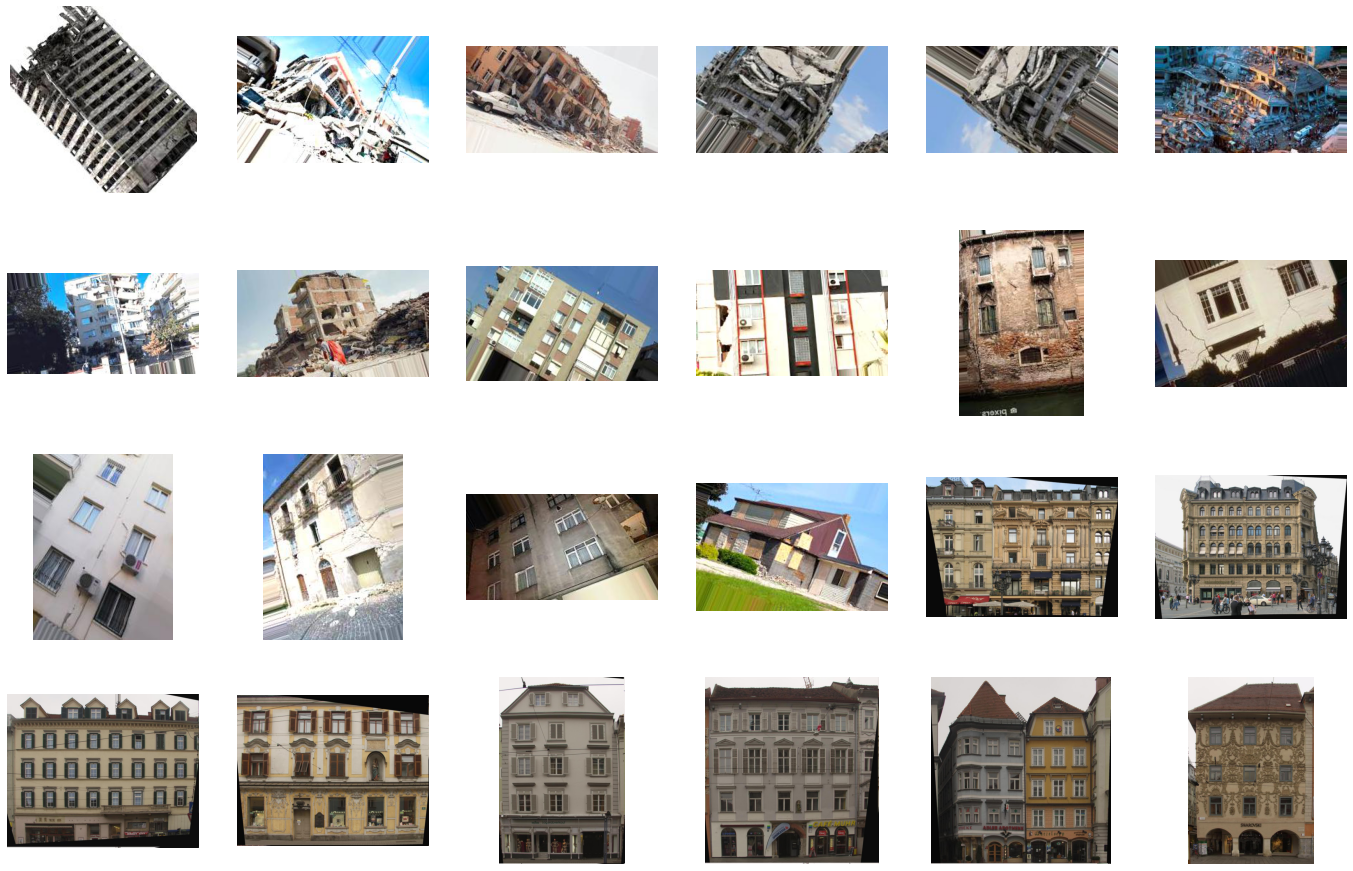

In [22]:
# Defining number of rows, number of columns and picture index that we iterate our photos.
'''
Görüntüleri ekrana basmak için, satır ve sütun sayılarını ve görüntülerin sıralanması için gereken iterationı tanımlıyoruz.
'''
nrows = 6
ncols = 6
pic_index = random.randint(1,20)

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 12

# Taking images from directories and then put them inside variables for printing.
'''
Görüntüleri dosyalardan alıp ardından değişken olarak tanımlıyoruz.
'''
next_damaged_pix = [os.path.join(train_damaged_dir, fname) 
                for fname in train_damaged_names[pic_index-8:pic_index]]

next_less_damaged_pix = [os.path.join(train_less_damaged_dir, fname) 
                for fname in train_less_damaged_names[pic_index-8:pic_index]]

next_non_damaged_pix = [os.path.join(train_non_damaged_dir, fname) 
                for fname in train_non_damaged_names[pic_index-8:pic_index]]

# That loop is for printing our photos side by side.
'''
Burada döngü kullanıyoruz. bunun sebebi sırasıyla rastgele olarak görüntüleri ekrana basmak.
'''
for i, img_path in enumerate(next_damaged_pix+next_less_damaged_pix+next_non_damaged_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

In [48]:
# That is our neural network model for training our datasets.
'''
Burada sinir ağı modelini eğitmek için oluşturuyoruz.
'''
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    '''
    Görüntülerin her biri aynı boyutta olması gerektiğinden 150x150 girişli ve renkli görüntüler olduğu için 3 byte renkli
    modeli inşa ediyoruz.
    '''
    # This is the first convolution
    '''
    İlk evrişimli sinir ağı katmanımız.
    '''
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    '''
    İkinci sinir ağı katmanımız.
    '''
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    '''
    Üçüncü sinir ağı katmanımız.
    '''
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    '''
    Flatten katmanımızı Dense Neural Networke besliyoruz. Buradaki sonuç flatten ile beraber tek boyutlu hale geliyor
    '''
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    '''
    512 nöronlu gizli katman.
    '''
    tf.keras.layers.Dense(512, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    # 3 output means our classification model has 3 labels.
    '''
    Hasarlı, az hasarlı ve hasarsız olan sınıflarımız için son katmandaki dense'e 3 yazıyoruz.
    '''
    tf.keras.layers.Dense(3, activation='sigmoid')
])
# Compiling all model with RMSprop optimizer which is good enough for images datas and categorical_crossentropy loss for 
# multi label classification model and last thing is our metric is accuracy.
'''
Tüm modeli RMSprop optimizasyonu ile compile ediyoruz. Ve ardından kayıp fonksiyonu için categorical crossentropy kullanıyoruz
3 farklı görüntü sınıfımız olduğu için bu fonksiyon en uygun şekilde çalışacaktır. Metrik olarak da accuracy metriğini seçiyoruz
'''
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.0001), metrics=['accuracy'])

# Print the model what we have.
'''
Oluşturduğumuz modeli ekrana basıyoruz.
'''
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 17, 17, 64)      

In [85]:
# All images will be rescaled by 1./255
'''
Tüm görüntüleri normalize etmek için 255 e bölüyoruz.
'''
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
                
validation_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

# Flow training images in batches of 128 using train_datagen generator
'''
Eğitim görüntülerini tanımlıyoruz.
'''
train_generator = train_datagen.flow_from_directory(
        # This is the directory for training images
        '''
        Buradaki dosya yolu eğitim görüntüleri için
        '''
        'C:\\Users\\cagri\\OneDrive\\Masaüstü\\MyDocuments\\Bionluk\\candeviren\\train',
        target_size=(150, 150),
        batch_size=11,
        # class mode is categorical because of 3 different label class we do have.
        '''
        Class mode'u da 3 farklı sınıfımız olduğundan categorical olarak tanımlıyoruz.
        '''
        class_mode='categorical')

# Flow training images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        # This is the source directory for validation images
        '''
        Buradaki dosya yolu validasyon görüntüleri için
        '''
        'C:\\Users\\cagri\\OneDrive\\Masaüstü\\MyDocuments\\Bionluk\\candeviren\\validation',
        target_size=(150, 150),
        batch_size=6,
        # class mode is categorical because of 3 different label class we do have.
        '''
        Class mode'u da 3 farklı sınıfımız olduğundan categorical olarak tanımlıyoruz.
        '''
        class_mode='categorical')

# Flow training images in batches of 128 using test_datagen generator
test_generator = test_datagen.flow_from_directory(
        # This is the source directory for test images
        '''
        Buradaki dosya yolu test görüntüleri için
        '''
        'C:\\Users\\cagri\\OneDrive\\Masaüstü\\MyDocuments\\Bionluk\\candeviren\\test',
        target_size=(150, 150),
        batch_size=15,
        # class mode is categorical because of 3 different label class we do have.
        '''
        Class mode'u da 3 farklı sınıfımız olduğundan categorical olarak tanımlıyoruz.
        '''
        class_mode='categorical')

Found 420 images belonging to 3 classes.
Found 90 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


In [51]:
# That step is for training all training and validation after building it.
'''
Bu adım, eğitim ve validasyon görüntülerini eğitmek için hazırlandı.
'''
history = model.fit(train_generator,validation_data = validation_generator,steps_per_epoch = 30,epochs = 20,
                    validation_steps = 16,verbose = 2)

Epoch 1/20
30/30 - 5s - loss: 1.0778 - accuracy: 0.4206 - val_loss: 1.0026 - val_accuracy: 0.4778 - 5s/epoch - 161ms/step
Epoch 2/20
30/30 - 4s - loss: 0.9537 - accuracy: 0.5701 - 4s/epoch - 135ms/step
Epoch 3/20
30/30 - 4s - loss: 0.8440 - accuracy: 0.6449 - 4s/epoch - 139ms/step
Epoch 4/20
30/30 - 4s - loss: 0.7678 - accuracy: 0.6791 - 4s/epoch - 138ms/step
Epoch 5/20
30/30 - 4s - loss: 0.6733 - accuracy: 0.7508 - 4s/epoch - 146ms/step
Epoch 6/20
30/30 - 4s - loss: 0.5927 - accuracy: 0.7913 - 4s/epoch - 144ms/step
Epoch 7/20
30/30 - 5s - loss: 0.5857 - accuracy: 0.7667 - 5s/epoch - 151ms/step
Epoch 8/20
30/30 - 4s - loss: 0.4982 - accuracy: 0.8131 - 4s/epoch - 139ms/step
Epoch 9/20
30/30 - 4s - loss: 0.5105 - accuracy: 0.7975 - 4s/epoch - 149ms/step
Epoch 10/20
30/30 - 4s - loss: 0.5006 - accuracy: 0.8287 - 4s/epoch - 141ms/step
Epoch 11/20
30/30 - 4s - loss: 0.4731 - accuracy: 0.8255 - 4s/epoch - 137ms/step
Epoch 12/20
30/30 - 4s - loss: 0.4392 - accuracy: 0.8193 - 4s/epoch - 137ms/

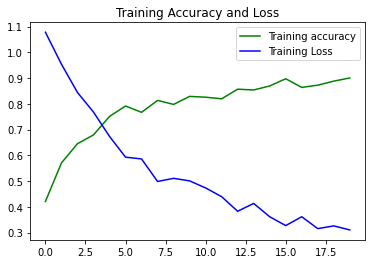

In [58]:
# Visualizing the result of training accuracy and training loss together in one plot.
'''
Eğitim görüntülerinin doğruluğu ve kayıp fonksiyonlarını görselletşirmek için matplotlib fonskiyonunu kullanıyoruz.
'''
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.title('Training Accuracy and Loss')
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.legend()

plt.show()

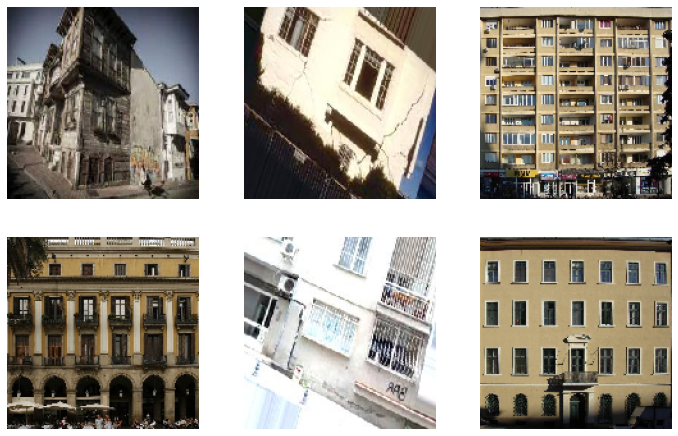

In [125]:
# Printing test samples...
'''
Test örneklerini ekrana basıyoruz.
'''
x,y = test_generator.next()
fig=plt.figure(figsize=(12,12))
for i in range(6):
    ax=fig.add_subplot(3,3,i+1)
    ax.imshow(x[i])
    ax.axis('off')

plt.show()

[0.78732604 0.9423804  0.06562421]
Less Damaged


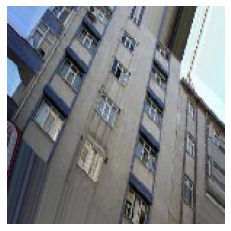

[0.91763854 0.7941561  0.07245725]
Damaged


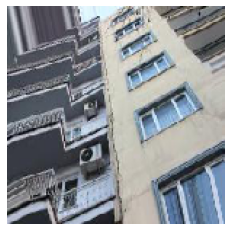

[0.99821883 0.47398633 0.00349131]
Damaged


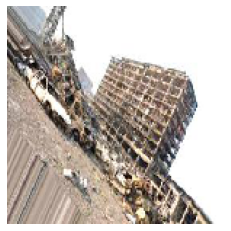

[0.5334226  0.22609365 0.90950227]
Non Damaged


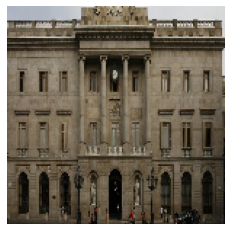

[0.56367236 0.24528638 0.8199078 ]
Non Damaged


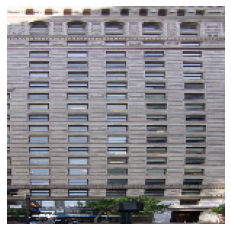

[0.51491463 0.99860454 0.02417621]
Less Damaged


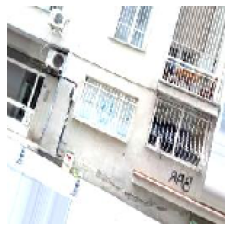

In [130]:
# In the end of project I put the test samples in order to predict for our model.
'''
Projenin sonuna gelindiğinde, test görüntülerini modelde tahmin etmek için bir döngü yazıyoruz.
'''
for i in range(len(test_generator)):
    x,y = test_generator.next()
    x = image.img_to_array(x[0])
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0][0] > classes[0][1] and classes[0][0] > classes[0][2]:
        print('Damaged')
    elif classes[0][1] > classes[0][2]:
        print('Less Damaged')
    else:
        print('Non Damaged')

    plt.imshow(x[0])
    plt.axis('off')
    plt.show()